In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

import sklearn.datasets
import pandas as pd
import numpy as np

housingData = sklearn.datasets.fetch_california_housing()
print housingData
housing = pd.DataFrame(housingData.data, columns=housingData.feature_names)
print "\n housing.head()\n", housing.head()
print "\n housing.info()\n", housing.info()
print "\n housing.describe()\n", housing.describe()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ..., 
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': 'California housing dataset.\n\nThe original database is available from StatLib\n\n    http://lib.stat.cmu.edu/\n\nThe data contains 20,640 observations on 9 variables.\n\nThis d

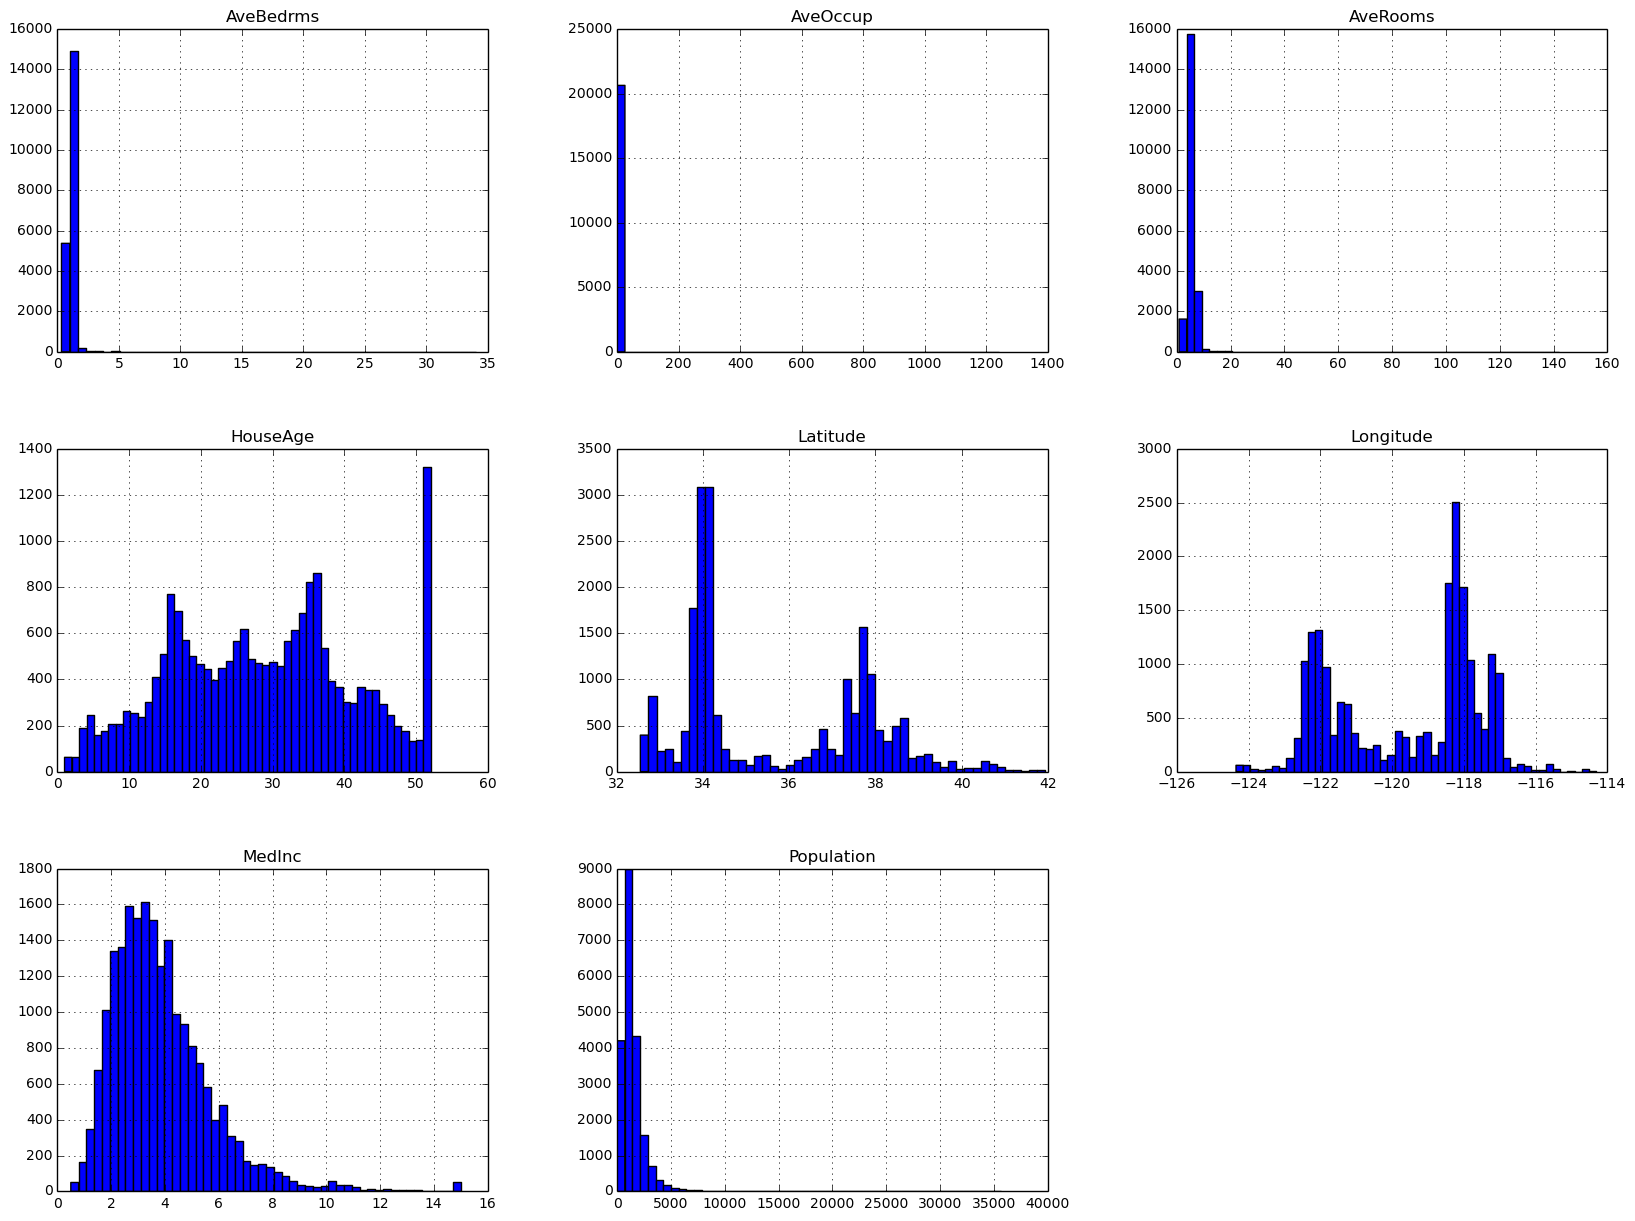

In [2]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

train_set, test_set=train_test_split(housingData.data, test_size=0.2, random_state=42)
train_y, test_y=train_test_split(housingData.target, test_size=0.2, random_state=42)

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

housing["income_cat"] = np.ceil(housing["MedInc"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
print strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64


In [5]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean       3.875589     28.653101      5.440341      1.098427   1419.790819   
std        1.904950     12.574726      2.611712      0.507070   1115.686241   
min        0.499900      1.000000      1.130435      0.333333      3.000000   
25%        2.566775     18.000000      4.442040      1.005857    784.000000   
50%        3.540900     29.000000      5.232284      1.048611   1164.000000   
75%        4.744475     37.000000      6.056361      1.099057   1719.250000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  16512.000000  16512.000000  16512.000000  
mean       3.096437     35.639577   -119.575834  
std       11.584826      2.138058      2.001860  
min        0.692308     32.540000   -124.350000  
25%        2.431287     33.940000   -1

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


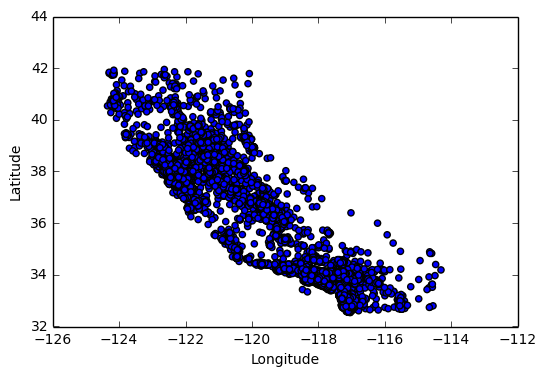

In [6]:
housing=strat_train_set.copy()
print housing.describe()
housing.plot(kind="scatter", x="Longitude", y="Latitude")
plt.show()

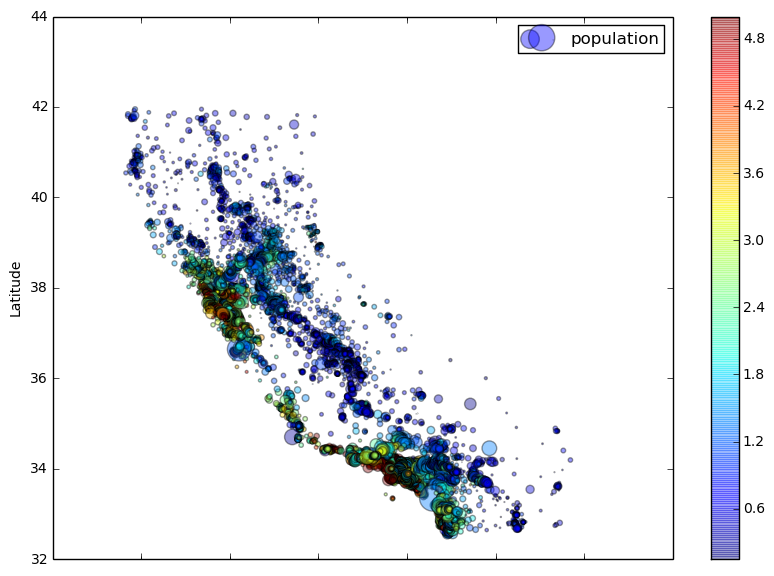

In [30]:
housing.describe()
housing.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
    s=housing["Population"]/100, label="population", figsize=(10,7),
    c=housingData.target, cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()
plt.show()

In [32]:
housing["median_house_value"] = pd.DataFrame(housingData.target)
corr_matrix = housing.corr()
print corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
MedInc                0.688075
AveRooms              0.151948
HouseAge              0.105623
AveOccup             -0.023737
Population           -0.024650
Longitude            -0.045967
AveBedrms            -0.046701
Latitude             -0.144160
Name: median_house_value, dtype: float64
